In [2]:
import math
x = []
y = []
z = []
x.append([])
y.append([])
z.append([])
idx = 0
min_x = [math.inf]
min_y = [math.inf]
min_z = [math.inf]
max_x = [-math.inf]
max_y = [-math.inf]
max_z = [-math.inf]
with open("txt/OSG_bb0n_X.txt") as f1, open("txt/OSG_bb0n_Y.txt") as f2, open("txt/OSG_bb0n_Z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x[idx].append( float(line1) )
            y[idx].append( float(line2) )
            z[idx].append( float(line3) )
            if(max_x[idx]<float(line1)):
                max_x[idx]=float(line1)
            if(min_x[idx]>float(line1)):
                min_x[idx]=float(line1)
            if(max_y[idx]<float(line2)):
                max_y[idx]=float(line2)
            if(min_y[idx]>float(line2)):
                min_y[idx]=float(line2)
            if(max_z[idx]<float(line3)):
                max_z[idx]=float(line3)
            if(min_z[idx]>float(line3)):
                min_z[idx]=float(line3)
        else:
            idx+=1
            x.append([])
            y.append([])
            z.append([])
            min_x.append(math.inf)
            min_y.append(math.inf)
            min_z.append(math.inf)
            max_x.append(-math.inf)
            max_y.append(-math.inf)
            max_z.append(-math.inf)
with open("txt/OSG_bb2n_Y.txt") as f1, open("txt/OSG_bb2n_Y.txt") as f2, open("txt/OSG_bb2n_Z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x[idx].append( float(line1) )
            y[idx].append( float(line2) )
            z[idx].append( float(line3) )
            if(max_x[idx]<float(line1)):
                max_x[idx]=float(line1)
            if(min_x[idx]>float(line1)):
                min_x[idx]=float(line1)
            if(max_y[idx]<float(line2)):
                max_y[idx]=float(line2)
            if(min_y[idx]>float(line2)):
                min_y[idx]=float(line2)
            if(max_z[idx]<float(line3)):
                max_z[idx]=float(line3)
            if(min_z[idx]>float(line3)):
                min_z[idx]=float(line3)
        else:
            idx+=1
            x.append([])
            y.append([])
            z.append([])
            min_x.append(math.inf)
            min_y.append(math.inf)
            min_z.append(math.inf)
            max_x.append(-math.inf)
            max_y.append(-math.inf)
            max_z.append(-math.inf)
x.pop()
y.pop()
z.pop()
min_x.pop()
min_y.pop()
min_z.pop()
max_x.pop()
max_y.pop()
max_z.pop()

-inf

In [20]:
eng=[]
eng.append([])
idx = 0
with open("txt/OSG_bb0n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng[idx].append( float(line) )
        else:
            idx+=1
            eng.append([])
eng.pop()
eng.append([])
print(len(eng))
with open("txt/OSG_bb2n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng[idx].append( float(line) )
        else:
            idx+=1
            eng.append([])
eng.pop()

1001


[]

In [5]:
sum(eng[10500])

14.106611

In [6]:
sum(eng[500])

81.57824299999999

In [7]:
import numpy as np
temp = np.ndarray(shape=(10,10,10), dtype=int)
temp.fill(0)
train=[]
i = 0
for (a,b,c) in zip(x,y,z):
    j=0
    for (line1,line2,line3) in zip(a,b,c):
        
        if( max_x[i]>min_x[i]):
            cur_x = (line1-min_x[i])/(max_x[i]-min_x[i])
        else:
            cur_x = 0.5
        if(max_y[i]>min_y[i]):
            cur_y =  (line2-min_y[i])/(max_y[i]-min_y[i])
        else:
            cur_y = 0.5
        if(max_z[i]>min_z[i]):
            cur_z =  (line3-min_z[i])/(max_z[i]-min_z[i])
        else:
            cur_z = 0.5
        if(cur_x>1):
            cur_x=1
        if(cur_y>1):
            cur_y=1
        if(cur_z>1):
            cur_z=1
        if(cur_x<0):
            cur_x=0
        if(cur_y<0):
            cur_y=0
        if(cur_z<0):
            cur_z=0
        temp[int(9*cur_x)][int(9*cur_y)][int(9*cur_z)]+=eng[i][j]
        j+=1
    i+=1
    train.append(temp)
    temp = np.ndarray(shape=(10,10,10), dtype=int)
    temp.fill(0)

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize(idx):
    x,y,z = train[idx].nonzero()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, -z, zdir='z', c= 'red')
    plt.show()

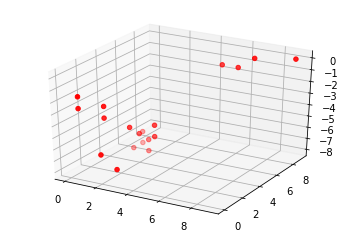

In [10]:
visualize(2)

In [12]:
label = np.ndarray(shape=(20000), dtype=int)
label[:10000].fill(0)
label[-10000:].fill(1)

In [18]:
import tensorflow as tf
from sklearn.utils import shuffle
X_train  = train[300:19700]
Y_train  = label[300:19700]
X_validation = train[300:19700]
y_validation = label[300:19700]

In [19]:
X_train, y_train = shuffle(X_train, Y_train)

In [20]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [21]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [22]:
X_train.shape

(19400, 10, 10, 10)

In [30]:
EPOCHS = 1000
BATCH_SIZE = 100

In [31]:
# from tensorflow.contrib.layers import flatten

# def LeNet(x):    
#     # Hyperparameters
#     mu = 0
#     sigma = 0.1
#     layer_depth = {
#         'layer_1' : 6,
#         'layer_2' : 16,
#         'layer_3' : 120,
#         'layer_f1' : 20
#     }
#     # TODO: Layer 1: Convolutional. Input = 1000x3. Output = x6.
#     conv1_w = tf.Variable(tf.truncated_normal(shape = [101,3,6],mean = mu, stddev = sigma))
#     conv1_b = tf.Variable(tf.zeros(6))
#     print(x.shape, conv1_w.shape)
#     conv1 = tf.nn.conv1d(x,conv1_w, stride = 1, padding = 'VALID')
#     conv1+= conv1_b 
#     # TODO: Activation.
#     conv1 = tf.nn.relu(conv1)

#     # TODO: Pooling. Input = 900x6. Output = 300x6.
#     pool_1 = tf.nn.pool(conv1
#                         ,window_shape = [3],
#                         pooling_type = 'MAX', 
#                         strides = [3], 
#                         padding = 'VALID')
    
#     # TODO: Layer 2: Convolutional. Output = 200x16.
#     conv2_w = tf.Variable(tf.truncated_normal(shape = [101,6,16], mean = mu, stddev = sigma))
#     conv2_b = tf.Variable(tf.zeros(16))
#     conv2 = tf.nn.conv1d(pool_1, conv2_w, stride = 1, padding = 'VALID') + conv2_b
#     # TODO: Activation.
#     conv2 = tf.nn.relu(conv2)

#     # TODO: Pooling. Input = 200x16. Output = 50x16.
#     pool_2 = tf.nn.pool(conv2,window_shape= [4], pooling_type = 'MAX', strides = [4], padding = 'VALID') 
    
#     # TODO: Flatten. Input = 50x16. Output = 800.
#     fc1 = flatten(pool_2)
    
#     # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
#     fc1_w = tf.Variable(tf.truncated_normal(shape = (800,120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
#     # TODO: Activation.
#     fc1 = tf.nn.relu(fc1)

#     # TODO: Layer 4: Fully Connected. Input = 120. Output = 20.
#     fc2_w = tf.Variable(tf.truncated_normal(shape = (120,20), mean = mu, stddev = sigma))
#     fc2_b = tf.Variable(tf.zeros(20))
#     fc2 = tf.matmul(fc1,fc2_w) + fc2_b
#     # TODO: Activation.
#     fc2 = tf.nn.relu(fc2)
    
#     # TODO: Layer 5: Fully Connected. Input = 20. Output = 2.
#     fc3_w = tf.Variable(tf.truncated_normal(shape = (20,2), mean = mu , stddev = sigma))
#     fc3_b = tf.Variable(tf.zeros(2))
#     logits = tf.matmul(fc2, fc3_w) + fc3_b
#     return logits

In [32]:
from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 64,
        'layer_f1' : 20
    }

    
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,10,6],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6. 8
#     pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16. 6
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16. 
#     pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # TODO: Flatten. Input = 5x5x16. Output = 400. 2x2x16
    fc1 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120. 64
    fc1_w = tf.Variable(tf.truncated_normal(shape = (64,20), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(20))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84. 20 5
    fc2_w = tf.Variable(tf.truncated_normal(shape = (20,5), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(5))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10. 5 2
    fc3_w = tf.Variable(tf.truncated_normal(shape = (5,2), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(2))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [33]:
x = tf.placeholder(tf.float32, (None, 10, 10,10))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 2)

In [34]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf. train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [35]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Complete")

Training...

EPOCH 1 ...
Validation Accuracy = 0.725

EPOCH 2 ...
Validation Accuracy = 0.742

EPOCH 3 ...
Validation Accuracy = 0.751

EPOCH 4 ...
Validation Accuracy = 0.762

EPOCH 5 ...
Validation Accuracy = 0.767

EPOCH 6 ...
Validation Accuracy = 0.770

EPOCH 7 ...
Validation Accuracy = 0.777

EPOCH 8 ...
Validation Accuracy = 0.779

EPOCH 9 ...
Validation Accuracy = 0.784

EPOCH 10 ...
Validation Accuracy = 0.787

EPOCH 11 ...
Validation Accuracy = 0.790

EPOCH 12 ...
Validation Accuracy = 0.790

EPOCH 13 ...
Validation Accuracy = 0.794

EPOCH 14 ...
Validation Accuracy = 0.795

EPOCH 15 ...
Validation Accuracy = 0.795

EPOCH 16 ...
Validation Accuracy = 0.799

EPOCH 17 ...
Validation Accuracy = 0.800

EPOCH 18 ...
Validation Accuracy = 0.801

EPOCH 19 ...
Validation Accuracy = 0.804

EPOCH 20 ...
Validation Accuracy = 0.803

EPOCH 21 ...
Validation Accuracy = 0.806

EPOCH 22 ...
Validation Accuracy = 0.808

EPOCH 23 ...
Validation Accuracy = 0.811

EPOCH 24 ...
Validation Accura

EPOCH 194 ...
Validation Accuracy = 0.904

EPOCH 195 ...
Validation Accuracy = 0.913

EPOCH 196 ...
Validation Accuracy = 0.924

EPOCH 197 ...
Validation Accuracy = 0.922

EPOCH 198 ...
Validation Accuracy = 0.929

EPOCH 199 ...
Validation Accuracy = 0.929

EPOCH 200 ...
Validation Accuracy = 0.926

EPOCH 201 ...
Validation Accuracy = 0.924

EPOCH 202 ...
Validation Accuracy = 0.917

EPOCH 203 ...
Validation Accuracy = 0.923

EPOCH 204 ...
Validation Accuracy = 0.921

EPOCH 205 ...
Validation Accuracy = 0.924

EPOCH 206 ...
Validation Accuracy = 0.924

EPOCH 207 ...
Validation Accuracy = 0.922

EPOCH 208 ...
Validation Accuracy = 0.911

EPOCH 209 ...
Validation Accuracy = 0.919

EPOCH 210 ...
Validation Accuracy = 0.926

EPOCH 211 ...
Validation Accuracy = 0.926

EPOCH 212 ...
Validation Accuracy = 0.926

EPOCH 213 ...
Validation Accuracy = 0.930

EPOCH 214 ...
Validation Accuracy = 0.933

EPOCH 215 ...
Validation Accuracy = 0.929

EPOCH 216 ...
Validation Accuracy = 0.916

EPOCH 217 .

EPOCH 385 ...
Validation Accuracy = 0.939

EPOCH 386 ...
Validation Accuracy = 0.942

EPOCH 387 ...
Validation Accuracy = 0.942

EPOCH 388 ...
Validation Accuracy = 0.943

EPOCH 389 ...
Validation Accuracy = 0.943

EPOCH 390 ...
Validation Accuracy = 0.938

EPOCH 391 ...
Validation Accuracy = 0.924

EPOCH 392 ...
Validation Accuracy = 0.925

EPOCH 393 ...
Validation Accuracy = 0.925

EPOCH 394 ...
Validation Accuracy = 0.939

EPOCH 395 ...
Validation Accuracy = 0.939

EPOCH 396 ...
Validation Accuracy = 0.943

EPOCH 397 ...
Validation Accuracy = 0.944

EPOCH 398 ...
Validation Accuracy = 0.942

EPOCH 399 ...
Validation Accuracy = 0.943

EPOCH 400 ...
Validation Accuracy = 0.939

EPOCH 401 ...
Validation Accuracy = 0.929

EPOCH 402 ...
Validation Accuracy = 0.925

EPOCH 403 ...
Validation Accuracy = 0.927

EPOCH 404 ...
Validation Accuracy = 0.931

EPOCH 405 ...
Validation Accuracy = 0.936

EPOCH 406 ...
Validation Accuracy = 0.939

EPOCH 407 ...
Validation Accuracy = 0.944

EPOCH 408 .

EPOCH 576 ...
Validation Accuracy = 0.946

EPOCH 577 ...
Validation Accuracy = 0.936

EPOCH 578 ...
Validation Accuracy = 0.924

EPOCH 579 ...
Validation Accuracy = 0.938

EPOCH 580 ...
Validation Accuracy = 0.943

EPOCH 581 ...
Validation Accuracy = 0.946

EPOCH 582 ...
Validation Accuracy = 0.948

EPOCH 583 ...
Validation Accuracy = 0.949

EPOCH 584 ...
Validation Accuracy = 0.948

EPOCH 585 ...
Validation Accuracy = 0.950

EPOCH 586 ...
Validation Accuracy = 0.947

EPOCH 587 ...
Validation Accuracy = 0.949

EPOCH 588 ...
Validation Accuracy = 0.935

EPOCH 589 ...
Validation Accuracy = 0.928

EPOCH 590 ...
Validation Accuracy = 0.936

EPOCH 591 ...
Validation Accuracy = 0.942

EPOCH 592 ...
Validation Accuracy = 0.943

EPOCH 593 ...
Validation Accuracy = 0.946

EPOCH 594 ...
Validation Accuracy = 0.949

EPOCH 595 ...
Validation Accuracy = 0.947

EPOCH 596 ...
Validation Accuracy = 0.948

EPOCH 597 ...
Validation Accuracy = 0.949

EPOCH 598 ...
Validation Accuracy = 0.950

EPOCH 599 .

EPOCH 767 ...
Validation Accuracy = 0.952

EPOCH 768 ...
Validation Accuracy = 0.943

EPOCH 769 ...
Validation Accuracy = 0.923

EPOCH 770 ...
Validation Accuracy = 0.937

EPOCH 771 ...
Validation Accuracy = 0.944

EPOCH 772 ...
Validation Accuracy = 0.949

EPOCH 773 ...
Validation Accuracy = 0.948

EPOCH 774 ...
Validation Accuracy = 0.951

EPOCH 775 ...
Validation Accuracy = 0.951

EPOCH 776 ...
Validation Accuracy = 0.951

EPOCH 777 ...
Validation Accuracy = 0.951

EPOCH 778 ...
Validation Accuracy = 0.952

EPOCH 779 ...
Validation Accuracy = 0.951

EPOCH 780 ...
Validation Accuracy = 0.948

EPOCH 781 ...
Validation Accuracy = 0.933

EPOCH 782 ...
Validation Accuracy = 0.941

EPOCH 783 ...
Validation Accuracy = 0.945

EPOCH 784 ...
Validation Accuracy = 0.945

EPOCH 785 ...
Validation Accuracy = 0.950

EPOCH 786 ...
Validation Accuracy = 0.951

EPOCH 787 ...
Validation Accuracy = 0.951

EPOCH 788 ...
Validation Accuracy = 0.952

EPOCH 789 ...
Validation Accuracy = 0.949

EPOCH 790 .

EPOCH 958 ...
Validation Accuracy = 0.954

EPOCH 959 ...
Validation Accuracy = 0.951

EPOCH 960 ...
Validation Accuracy = 0.944

EPOCH 961 ...
Validation Accuracy = 0.939

EPOCH 962 ...
Validation Accuracy = 0.939

EPOCH 963 ...
Validation Accuracy = 0.947

EPOCH 964 ...
Validation Accuracy = 0.950

EPOCH 965 ...
Validation Accuracy = 0.952

EPOCH 966 ...
Validation Accuracy = 0.953

EPOCH 967 ...
Validation Accuracy = 0.953

EPOCH 968 ...
Validation Accuracy = 0.953

EPOCH 969 ...
Validation Accuracy = 0.953

EPOCH 970 ...
Validation Accuracy = 0.951

EPOCH 971 ...
Validation Accuracy = 0.953

EPOCH 972 ...
Validation Accuracy = 0.942

EPOCH 973 ...
Validation Accuracy = 0.947

EPOCH 974 ...
Validation Accuracy = 0.946

EPOCH 975 ...
Validation Accuracy = 0.948

EPOCH 976 ...
Validation Accuracy = 0.949

EPOCH 977 ...
Validation Accuracy = 0.951

EPOCH 978 ...
Validation Accuracy = 0.943

EPOCH 979 ...
Validation Accuracy = 0.946

EPOCH 980 ...
Validation Accuracy = 0.949

EPOCH 981 .